In [5]:
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

data = torch.load("alpha_1e-3_snapshot_lr_01/loss_log.pt")

#train_dset = torch.load("alpha_1e-3/train.dset")
#print(len(train_dset))
folder = "../test_case_4/"

gt_initial_beam = torch.load(folder + "ground_truth_dist.pt")


In [6]:
# get predicted covariances
cov = torch.cat([ele[-2].unsqueeze(0) for ele in data])


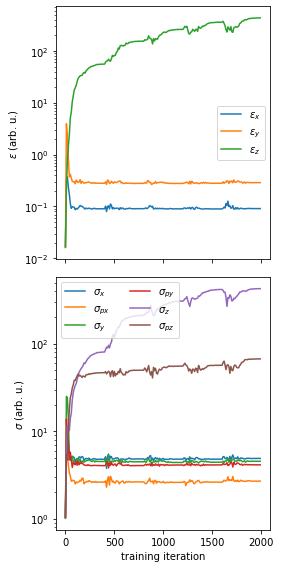

In [7]:
# plot emit_x
emits = []
for i in range(3):
    g = i*2
    emits.append(torch.det(cov[:, g:g+2,g:g+2]).sqrt())

fig,(ax, ax2) = plt.subplots(2,1, sharex="all")
fig.set_size_inches(4,8)
labels = ["x", "y", "z"]
mean_energy = 65
scale = 1
idx = slice(0, len(emits[0]), 10)
t = torch.arange(len(emits[0]))[idx]
for i in range(3):
    ax.semilogy(t, emits[i].cpu().detach()[idx] * scale / mean_energy,
                label=f"$\epsilon_{labels[i]}$",
                c=f"C{i}")

sigmas = []
labels = ["x", "px", "y", "py", "z", "pz"]
for i in range(6):
    sigmas.append(cov[:,i,i].sqrt())
    ax2.semilogy(t, sigmas[-1].cpu().detach()[idx],label=f"$\sigma_{{{labels[i]}}}$",
                c=f"C{i}")

ax.set_ylabel("$\epsilon$ (arb. u.)")
ax2.set_ylabel("$\sigma$ (arb. u.)")
ax2.set_xlabel("training iteration")
ax.legend()
ax2.legend(ncol=2, loc=2)
fig.tight_layout()
#fig.savefig("convergence.svg")


NameError: name 'gt_rms' is not defined

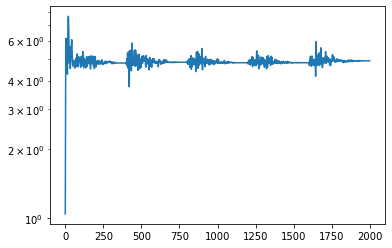

In [8]:
sigmas = []
fig,ax = plt.subplots()
labels = ["x", "px", "y", "py", "z", "pz"]
for i in range(6):
    sigmas.append(cov[:,i,i].sqrt())
    ax.semilogy(sigmas[-1].cpu().detach(),label=f"$\sigma_{{{labels[i]}}}$",
                c=f"C{i}")
    ax.axhline(gt_rms[i].sqrt(), ls='--', c=f"C{i}")

print(gt_rms[-i].sqrt())
ax.legend()